# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
<p>The objective is to find a yes or no answer, whether a student is likely to fail and hence need intervention: Yes or No. We have labeled data. This is clearly a Binary Classification problem of Supervised Learning.</p> <p>We are not after a target of continous values hence its not a Regression Problem, however if we were asked to get a probability if a student will pass or fail, then the  probability would have a continuos value, the problem will become a Regression problem,  </sub></p>

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [336]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import seaborn as sns
%matplotlib inline

# Read student data
df = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [374]:
#df.head(2)

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


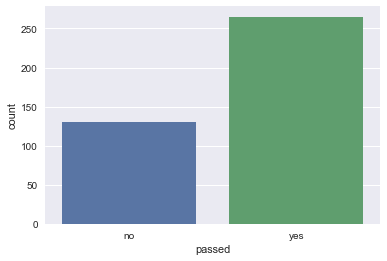

In [9]:
# TODO: Calculate number of students
n_students = len(df)

# TODO: Calculate number of features
n_features = df.shape[1] -1

# TODO: Calculate passing students
n_passed = len(df[df.passed=='yes'])

# TODO: Calculate failing students
n_failed = len(df[df.passed=='no'])

# TODO: Calculate graduation rate
grad_rate = (n_passed/float(n_students))*100.

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)
sns.countplot(x='passed', data=df)

## Data Analysis
<ul>
<li>This data set has 30 features and comparatively lesser no# of data: 395
<li>With out any Estimator we can predict 67% student dont need any intervention as they will pass

</ul>

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [10]:
# Extract feature columns
feature_cols = list(df.columns[:-1])

# Extract target column 'passed'
target_col = df.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = df[feature_cols]
y_all = df[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [11]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [134]:
# Tree based Feature Selection to compute Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from IPython.display import display
print(X_all.shape)
clf_features_sel=ExtraTreesClassifier()
clf_features_sel.fit(X_all, y_all)
feature_importance=pd.DataFrame()
feature_importance['Feature']=list(X_all.columns)
feature_importance['Importance']=clf_features_sel.feature_importances_
#print(zip(clf_features_sel.feature_importances_,list(X_all.columns)))
#display(feature_importance.sort_values(by='Importance',ascending=False))

(395, 48)


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [259]:
# Trying out Startified ShuffleSplit 
from sklearn.model_selection import StratifiedShuffleSplit
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# using Shufflesplit to get Train/Test sets
ss=StratifiedShuffleSplit(test_size=num_test,train_size=num_train,random_state=3) 
ss.get_n_splits(X_all)
print(ss)
for train_index, test_index in ss.split(X_all,y_all):
    #print("train:", train_index, "Test:",test_index)
    X_train=X_all.ix[train_index]
    X_test=X_all.ix[test_index]
    y_train=y_all.ix[train_index]
    y_test=y_all.ix[test_index]
 

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

StratifiedShuffleSplit(n_splits=10, random_state=3, test_size=95,
            train_size=300)
Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
<p>Before we delve into choice of Learning model, let's </p>
***Reference***
http://scikit-learn.org/stable/tutorial/machine_learning_map/

<ol>
<li> <b>Support Vector Machines (SVM):</b>
	<ul>
		<li><b>Real-world application in industry</b>
        <p>Reference: https://en.wikipedia.org/wiki/Support_vector_machine</p>
        <p>SVMs are helpful in text and hypertext categorization </p>
        <p>handwritten character recognition </p>
        <p>The SVM algorithm has been widely applied in Bio Sciences: Protien classification, Cancer Classification. They have been used to classify proteins with up to 90% of the compounds classified correctly</p>
		<p>Very useful in building models for Classification problems with small sample size </p>
        <p></p></li>
		
        <li><b>Strengths of the model</b>
        <p>Reference: http://scikit-learn.org/stable/modules/svm.html#classification</p>
			<p>SVMs can operate on large feature set</p>
            <p>Still effective in cases where number of dimensions is greater than the number of samples.</p>
            <p>Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient</p>
            <p></p>
        </li>
		<li><b>Weaknesses of the model</b>
        <p>SVMs is not efficient on Large Data Set, though depends on the kernel the complexity of the model in N^3</p>
        <p>performs poorly if the data has lots of noise</p>
        <p>the classes overlaps with each other considerably, SVM .</p>
        </li>
        <p></p>
		<li><b>What makes this model a good candidate for the problem</b>
        <p> We have a binary classification problem in hand with high dimentionality : 30 features and only 395 sample data. SVM works well on large feature set with less data. Hence SVM will be a good candiate for our model selection
        </li>
        <p></p>
	</ul>
</li>

<li> <b>K Nearest Neigbhor(KNN):</b>
	<ul>
		<li><b>Real-world application in industry</b>
        <p>Reference: https://en.wikipedia.org/wiki/Support_vector_machine</p>
        <p>Reference: https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm</p>
        <p>KNNs are helpful to find similarilty based on their Nearest neigbors.</p>
        <p>Real life applications can be  Recommendation systems (Netflix/Amazon): To find similar items based on likes: compare set of users who liked one item, if similar set of users likes two different items, the items will be similar is the basic idea here.</p>
        <p>KNN is used in text and hypertext categorization, example categorize books to genres based on their text</p>
        <p></p></li>
		
        <li><b>Strengths of the model</b>
        <p>Reference: https://www.projectrhea.org/rhea/index.php/KNN-K_Nearest_Neighbor_OldKiwi</p>
			<p>KNNs are are simple , non parametric can operate on large feature set</p>
            <p>it is simple and powerful in hands of an user knows the domian well.</p>
            <p></p>
         </li>
		<li><b>Weaknesses of the model</b>
        <p>Data domain knowledge is important to determine right parameters for the model </p>
        <p>Computation cost is higher since it calculates distance from all data points</p>
        <p></p>
        </li>
		<li><b>What makes this model a good candidate for the problem</b>
        <p> In our case the we are trying to classify students likely to fail based on their similarity across a lot of features : past pefromance, family backround, access to utilities like internet etc. We have a relatively small no # of sample size, hence computation cost will not be a problem.
        </li>
        <p></p>
	</ul>
</li>

<li> <b>Ensemble Methods- Bagging with SVC:</b>
	<ul>
		<li><b>Real-world application in industry</b>
            <p>Reference: https://www.quora.com/Can-you-give-some-specific-examples-of-Ensemble-Learning</p>
            <p>Ensembles techniques combines multiple models to predict better </p>
            <p>All most all practical ML may use Ensemble techniques </p>
            <p>Ensembles are used in few well recognized Kaggle competetions </p>
            <p></p>
        </li>
		
        <li><b>Strengths of the model</b>
        <p>It reduces variance and improves the accuarcy of the resulting model </p>
        <p></p>
        </li>
		<li><b>Weaknesses of the model</b>
        Reference:http://www.stat.cmu.edu/~ryantibs/datamining/lectures/24-bag.pdf
        <p>Computationally Bagging is more costly than the base Model</p>
        <p>The final model is difficult to interpret</p>
        <p></p>
        </li>
		<li><b>What makes this model a good candidate for the problem</b>
        <p>In bagging multiple models trained on sample subset votes for a test data. Finally we choose the most voted class. Since overall bagging promises to increase accuracy of the resulting model, I will perefer to try this ensemble technique for our classification problem </p>
        </li>
        <p></p>
	</ul>
</li>

</ol>

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [262]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    #print "Trained model in {:.4f} seconds".format(end - start)
    return (round((end - start),5))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    #print "Made predictions in {:.4f} seconds.".format(end - start)
    return [f1_score(target.values, y_pred, pos_label='yes'),round((end - start),5)]


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    #print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    # Train the classifier
    #print "Trained model in {:.4f} seconds".format(train_classifier(clf, X_train, y_train))
    classifier_name=clf.__class__.__name__
    class_size=len(X_train)
    dictKey=classifier_name +"_"+str(class_size)
    
    train_time=train_classifier(clf, X_train, y_train)
    pred_time_test=predict_labels(clf, X_test, y_test)[1]
    f1_score_train=predict_labels(clf, X_train, y_train)[0]
    f1_score_test=predict_labels(clf, X_test, y_test)[0]
    df_dict[dictKey]={'Training Time':train_time,'Prediction Time (test)':pred_time_test,'F1 Score (train)':f1_score_train,'F1 Score (test)':f1_score_test}
    #print('Train Time: ',train_time, ' Pred Time: ',pred_time, 'f1_score :',f1_score)
    #print(df_dict)
    
    #results=pd.DataFrame(df_dict).stack().unstack(0) # to Transpose the data
    #results.head()
    # Print the results of prediction for both training and testing
    #print ("F1 score for training set:", predict_labels(clf, X_train, y_train)) #{:.4f}.".format(predict_labels(clf, X_train, y_train))
    #print ("F1 score for test set:",predict_labels(clf, X_test, y_test))# {:.4f}.".format(predict_labels(clf, X_test, y_test))

In [271]:
#del df_dict,results

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [300]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# a Dictionary which holds the results
df_dict={}
# TODO: Initialize the three models
clf_NB = GaussianNB()
for i in np.arange(100,400,100):
    #print i
    train_predict(clf_NB, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)

# DecisionTreeClassifier
clf_DescisionTree = DecisionTreeClassifier(random_state=0)
for i in np.arange(100,400,100):
    train_predict(clf_DescisionTree, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)

#Using Ensemble Bagging with SVC
clf_EM_Bagging = BaggingClassifier(SVC(),max_samples=0.5, max_features=0.5)
#clf_EM_Bagging = BaggingClassifier(LogisticRegression(),max_samples=0.5, max_features=0.5)
for i in np.arange(100,400,100):
    train_predict(clf_EM_Bagging, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)    

#Using AdaBoosting
clf_EM = AdaBoostClassifier()
for i in np.arange(100,400,100):
    train_predict(clf_EM, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)
    
# Using Gradient Boosting
clf_GradBoost=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
for i in np.arange(100,400,100):
    train_predict(clf_GradBoost, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)

# Using Random Forrest Classifier
clf_randomF=RandomForestClassifier()
for i in np.arange(100,400,100):
    train_predict(clf_randomF, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)
    
# K Nearset Neighbours 
# construct the set of hyperparameters to tune
params = {"n_neighbors": np.arange(1, 26, 5),
	"metric": ["euclidean", "cityblock"]}
clf_KNN = KNeighborsClassifier(n_neighbors= 25,metric= "cityblock")
clf_KNN_CV=RandomizedSearchCV(clf_KNN, params)
for i in np.arange(100,400,100):
    #print i
    train_predict(clf_KNN, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)

# Stochastic Gradient Decsent
clf_StoGD = SGDClassifier(loss="modified_huber") #, penalty="l2"
for i in np.arange(100,400,100):
    train_predict(clf_StoGD, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)

#Solution Vector Classifier
parameters = {'C':            np.arange( 1, 100+1, 1 ).tolist(),'kernel':['linear', 'rbf'],# precomputed,'poly', 'sigmoid'
    'degree':       np.arange( 0, 100+0, 1 ).tolist(),
    'gamma':        np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
    'coef0':        np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
}
clf_svc = SVC()
#clf_svc_CV=RandomizedSearchCV(clf_svc,parameters)
for i in np.arange(100,400,100):
    train_predict(clf_svc, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)
#print(clf_svc_CV.best_estimator_)

# Logistic Regression 
clf_LR = LogisticRegression()
for i in np.arange(100,400,100):
    train_predict(clf_LR, X_train.sample(n=i), y_train.sample(n=i), X_test, y_test)

# TODO: Set up the training set sizes
# TODO: Execute the 'train_predict' function for each classifier and each training set size


In [301]:
# Results of All Models
results=pd.DataFrame(df_dict)
results=results.stack().unstack(0)
display(results)

,F1 Score (test),F1 Score (train),Prediction Time (test),Training Time
AdaBoostClassifier_100,0.587302,0.902256,0.00431,0.09849
AdaBoostClassifier_200,0.711111,0.851064,0.00398,0.10396
AdaBoostClassifier_300,0.696296,0.826374,0.00446,0.10981
BaggingClassifier_100,0.805031,0.843931,0.00396,0.02312
BaggingClassifier_200,0.782051,0.826748,0.00442,0.02374
BaggingClassifier_300,0.805031,0.802395,0.00720,0.02503
DecisionTreeClassifier_100,0.660870,1.000000,0.00021,0.00079
DecisionTreeClassifier_200,0.713178,1.000000,0.00020,0.00126
DecisionTreeClassifier_300,0.738462,1.000000,0.00029,0.00192
GaussianNB_100,0.395349,0.568627,0.00033,0.00114


***From Above Table ***
Seems Stochastic Gradient Decent Classifier is clear choice of our model 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVC **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.001            |     0.0006             |   0.85           |    0.81         |
| 200               |        0.003            |     0.0016             |   0.81           |   0.805         |
| 300               |        0.008            |     0.0021             |   0.83           |   0.805         |

** Classifer 2 KNN **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.21729             |     0.00203            |   0.86           |    0.79         |
| 200               |     0.26110             |     0.00289            |   0.80           |    0.78         |
| 300               |     0.30459             |     0.00309            |   0.80           |    0.80         |

** Classifer 3 Ensemble: Bagging with SVC **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.02233              |     0.00355            |  0.80            |  0.79           |
| 200               |    0.02409              |     0.00479            |  0.80            |  0.80           |
| 300               |    0.02887              |     0.00566            |  0.80            |  0.80           |

In [366]:
# Get the models for which f1_score is > 0.78, with lesser Test Time
df2=pd.DataFrame()
df2=results[(results['F1 Score (test)']>.79)].copy(deep=True)
df2=df2.sort_values(by=['F1 Score (test)','Prediction Time (test)'], ascending=[False, True])
#display(df2) # Getting the classifier with >.79 f1 score test
#df2.reset_index(level=0, inplace=True)
#df2.index.rename('Classifiers', inplace=False)
display(df2)

,F1 Score (test),F1 Score (train),Prediction Time (test),Training Time
KNeighborsClassifier_300,0.810127,0.804878,0.00342,0.00059
SVC_200,0.807692,0.803738,0.00115,0.00346
SGDClassifier_300,0.805031,0.802395,0.00015,0.00069
SGDClassifier_200,0.805031,0.808383,0.00016,0.00070
SVC_300,0.805031,0.810484,0.00156,0.00602
KNeighborsClassifier_100,0.805031,0.814371,0.00173,0.00050
BaggingClassifier_100,0.805031,0.843931,0.00396,0.02312
BaggingClassifier_300,0.805031,0.802395,0.00720,0.02503
SVC_100,0.797468,0.777070,0.00071,0.00113


## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

In [343]:
# weighted Training + Testing Time with Test Scores to Compare Output of different module 
# on F1_score + Traininfg + Testing Time cost
df2['TimeFactor']=df2['Prediction Time (test)']*1000+df2['Training Time']*1000
# more time the model takes less it scores
# The better the F1 score is better the model scores
df2['ModelEvaluationScore']=(df2['F1 Score (test)']*100)/(df2['TimeFactor']) 
df3=df2[['F1 Score (test)','TimeFactor','ModelEvaluationScore']]
display(df3.sort_values(by='ModelEvaluationScore', ascending=False))

,F1 Score (test),TimeFactor,ModelEvaluationScore
SGDClassifier_300,0.805031,0.84,95.837077
SGDClassifier_200,0.805031,0.86,93.608308
SVC_100,0.797468,1.84,43.340671
KNeighborsClassifier_100,0.805031,2.23,36.100065
KNeighborsClassifier_300,0.810127,4.01,20.202658
SVC_200,0.807692,4.61,17.520441
SVC_300,0.805031,7.58,10.620468
BaggingClassifier_100,0.805031,27.08,2.972790
BaggingClassifier_300,0.805031,32.23,2.497771


### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
To choose the best model from the experiment above, we need some sort of ModelEvaluation Score which should ocnisder the F1_score of the model , also the time cost of the model.

I have formulized a simple wieghted score of Training and Testing Time. 
Now score of a model will improve if the model's F1_Score is higher, on the other hand if the model takes more time to Train and Predict then the Model score should drop. 

<b>From the table above the best model based on Test Score + Computational time in Stochastic Gradient Descent Classifier (SDGC). However it is not the model I expected to be the winner in our case.. hence it was not in my top 3 choice. But now since data shows SDGC is clear winner I will propose SGDC to be used for this project. 

It predicts data well (with F1_score>80%) with the lowest training and testing time /computational cost</b>

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
The model that yields best result is called Stochastic Gradient Descent Classifier (SGDC).
To understand SGDC better we need to understand Logistical Regression (LR)
It works in following way:
The job of LR is to predict how confident it is by calculating likelyhood (probability) of a binary outcome (for simiplicity the outcome of classification can be 0 or 1 value, in our case a Student is likely to pass or fail) based on the independent attributes or features of training data.
To do so LR assumes a function to predict the probabilty of training data sets. 
Step1: The function predicts outcome for the training Data set
Step 2: The outcome is compared against the actual values in Training Data set & Error Value is generated
Step3: The goal of LR is to adjust the parameters of function to reduce the error in prediction in next pass on training data set

These steps repeats till we parameters of the function which minimize the error in prediction on traininng data.

SGDC makes the above steps efficient and simple by taking smart assumptions & selecting random sample training data.

Source: http://scikit-learn.org/stable/modules/sgd.html#sgd
The advantages of Stochastic Gradient Descent are: 
1. Efficiency
2. Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:
1.SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.        2.SGD is sensitive to feature scaling: Meaning if a feautre /characteristic has larger range of values that other feature (For example Salary can vary from 50,000 to 200,000, where as  workin age of a person can vary from 20-70.. in this case the model will favor variation in Salary more than Age factor)



### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [372]:
# Get the estimator
def bestclf(grid_obj):
    grid_obj.fit(X_train, y_train)
    clf_best=grid_obj.best_estimator_
    print(grid_obj.best_estimator_)
    print('Train: ',predict_labels(clf_best, X_train, y_train))
    print('Test: ',predict_labels(clf_best, X_test, y_test))
    # Report the final F1 score for training and testing after parameter tuning
    #print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
    #print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

In [373]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer
#from sklearn.metrics import f1_score

f1_scorer = make_scorer(f1_score, pos_label="yes")
# TODO: Create the parameters list you wish to tune
SGDC_parameters = {'loss':['hinge'],#'squared_hinge','log',, 'modified_huber',  'perceptron'
             'penalty':['none','l1','l2'],#,'elasticnet'],
             'learning_rate':['optimal']} #'constant','invscaling'
            #,
             #'eta0':[0.1,0,0.1]}
SGDC_parameters_1={}
clf_new_SDGC=SGDClassifier()
grid_obj_SDGC = GridSearchCV(estimator=clf_new_SDGC,param_grid=SGDC_parameters,scoring=f1_scorer)
bestclf(grid_obj_SDGC)
        
#Knn Params:
# knn_params = {"n_neighbors": np.arange(1, 26, 5),
# 	"metric": ["euclidean", "cityblock"]}
# clf_new_knn = KNeighborsClassifier()
# grid_obj_KNN = GridSearchCV(estimator=clf_new_knn,param_grid=knn_params,scoring=f1_scorer)
# grid_obj_KNN.fit(X_train, y_train)
# #print(grid_obj_KNN.best_estimator_)
# bestclf(grid_obj_KNN)

# SVC As a Model
# svc_parameters = {'C':            np.arange( 1, 100+1, 1 ).tolist(),'kernel':['linear','rbf'],# , 'rbf',precomputed,'poly', 'sigmoid'
#     }
# ''''degree':       np.arange( 0, 10+0, 1 ).tolist(),
#     'gamma':        'np.arange( 0.0, 1.0+0.0, 0.1 ).tolist()',
#     'coef0':        np.arange( 0.0, 1.0+0.0, 0.1 ).tolist(),'''

# clf_new_SVC = SVC()
# grid_obj_SVC = GridSearchCV(estimator=clf_new_SVC,param_grid=svc_parameters,scoring=f1_scorer)
# bestclf(grid_obj_SVC)


# TODO: Initialize the classifier
# TODO: Make an f1 scoring function using 'make_scorer' 
#f1_scorer = None

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
#grid_obj = None

# TODO: Fit the grid search object to the training data and find the optimal parameters
#grid_obj = None


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
('Train: ', [0.80742459396751731, 0.00032])
('Test: ', [0.8085106382978724, 0.00028])


In [288]:
# results=pd.DataFrame(df_dict)
# results=results.stack().unstack(0)
# display(results)

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
<p></p>
***Post Tuning F1 Scores***
<ul>
<li>Train: 0.8074</li>
<li>Test: 0.808</li>
</ul>

*** Pre Tuning F1 Scores***
<ul>
<li>Train: 0.802</li>
<li>Test: 0.805</li>
</ul>

<p> There is not much improvement in the Score after Tuning. There is a lot of parameter in SDGC that have impact on the out come, I have only tinkered with penalty. which may be the cuase of this minimal change in F1 score. Or it may happen based on the data set this is the highest F1_Score we can get out the model with out overfitting </p>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.